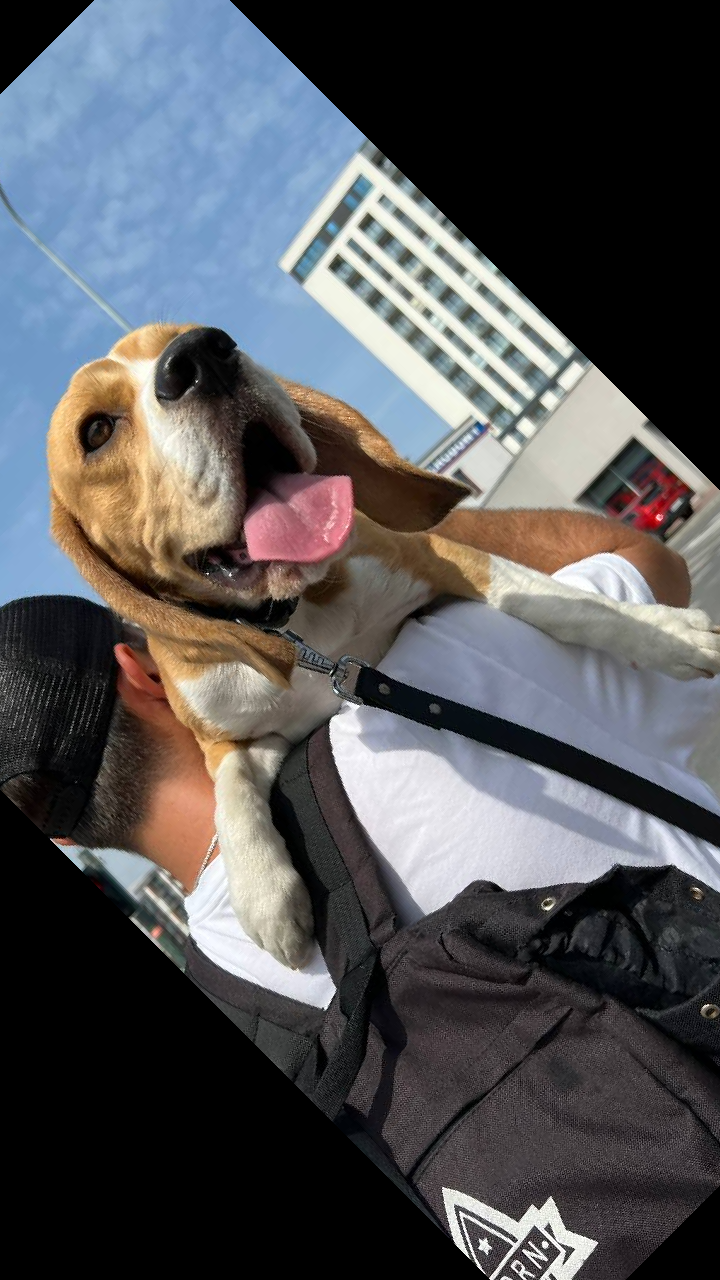

In [1]:
from PIL import Image
with Image.open("images/dog.jpeg") as im:
    im.rotate(45).show()

In [2]:
from PIL import Image, ImageDraw, ImageFont
import os

In [3]:
image_directory = "../Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854"

In [4]:
image_files = [
    "end-allentown.png", "end-bg.jpg", "end-cta.png", "end-framingdale.png",
    "end-southamptpon.png", "end-willowgrove.png", "engagement_animation_1.png",
    "engagement_instruction_1.png", "game_1.png", "game_2.png", "game_endfrmae.png",
    "header.jpg", "MPU-click-area.png", "rev-thumbnail-mpu.jpg", "thumbnail.jpg"
]

In [5]:
images = {}
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    try:
        image = Image.open(image_path)
        images[image_file] = image
    except Exception as e:
        print(f"Could not load {image_file}: {e}")

# Check loaded images
for name, img in images.items():
    print(f"{name}: {img.size}, {img.mode}")

end-allentown.png: (600, 500), P
end-bg.jpg: (600, 500), RGB
end-cta.png: (234, 50), P
end-framingdale.png: (600, 500), P
end-southamptpon.png: (600, 500), P
end-willowgrove.png: (600, 500), P
engagement_animation_1.png: (90, 108), P
engagement_instruction_1.png: (380, 63), P
game_1.png: (335, 61), P
game_2.png: (335, 61), P
game_endfrmae.png: (173, 92), P
header.jpg: (600, 200), RGB
MPU-click-area.png: (600, 500), P
rev-thumbnail-mpu.jpg: (600, 300), RGB
thumbnail.jpg: (600, 300), RGB


In [6]:
def create_advert_frame(header_image, main_image, cta_image):
    # Create a blank canvas
    canvas_width = max(header_image.width, main_image.width, cta_image.width)
    canvas_height = header_image.height + main_image.height + cta_image.height + 60  # 20px margin between elements
    canvas = Image.new('RGB', (canvas_width, canvas_height), (255, 255, 255))

    # Draw images onto the canvas
    y_offset = 20
    canvas.paste(header_image, (int((canvas_width - header_image.width) / 2), y_offset))
    y_offset += header_image.height + 20
    canvas.paste(main_image, (int((canvas_width - main_image.width) / 2), y_offset))
    y_offset += main_image.height + 20
    canvas.paste(cta_image, (int((canvas_width - cta_image.width) / 2), y_offset))

    return canvas

    # Save the final advert frame
    #canvas.save(output_path)
    #print(f"Advert frame saved to {output_path}")


header_image = images["header.jpg"]
main_image = images["end-bg.jpg"]
cta_image = images["end-cta.png"]
#output_path = "../results/frames/advert_frame.jpg"
#create_advert_frame(header_image, main_image, cta_image, output_path)


/home/grace_nyutu/semantic/venv/lib/python3.8/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


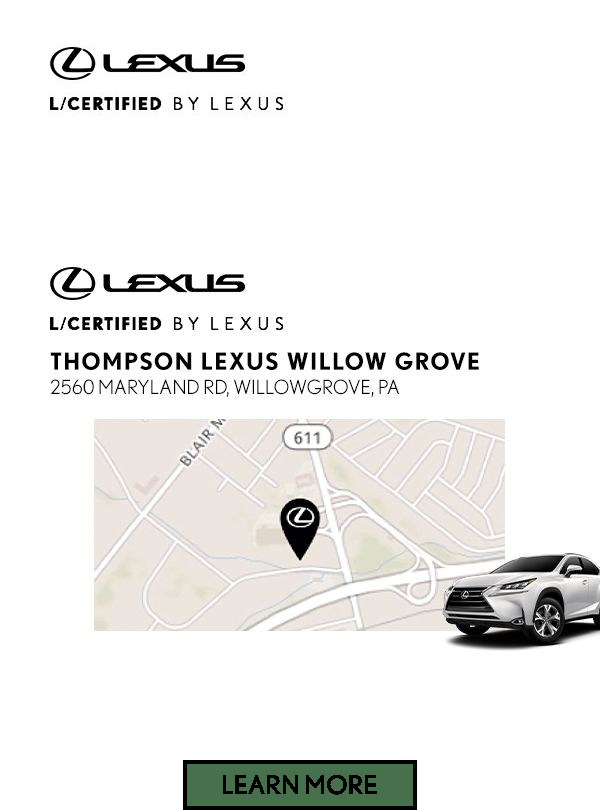

In [7]:
create_advert_frame(header_image, main_image, cta_image)

In [8]:
def create_storyboard(image_files, output_path):
    # Define dimensions for the storyboard
    frame_width, frame_height = 400, 300  # Example dimensions for each frame
    storyboard_columns = 3
    storyboard_rows = (len(image_files) + storyboard_columns - 1) // storyboard_columns  # Calculate rows needed
    storyboard_width = storyboard_columns * frame_width
    storyboard_height = storyboard_rows * frame_height

    # Create a blank storyboard canvas
    storyboard = Image.new('RGB', (storyboard_width, storyboard_height), (255, 255, 255))

    # Paste each frame onto the storyboard
    for index, (name, img) in enumerate(images.items()):
        # Resize the image to fit in a frame
        img_resized = img.resize((frame_width, frame_height))
        x_offset = (index % storyboard_columns) * frame_width
        y_offset = (index // storyboard_columns) * frame_height
        storyboard.paste(img_resized, (x_offset, y_offset))

    # Save the final storyboard
    storyboard.save(output_path)
    print(f"Storyboard saved to {output_path}")

# Example usage
output_path = "../results/storyboard/storyboard.jpg"
create_storyboard(image_files, output_path)


Storyboard saved to ../results/storyboard/storyboard.jpg


In [9]:
VERTICAL_POSITIONING = {'Logo': [1], 'CTA Button': [1, 2, 3], 'Icon': [1, 2, 3], 'Product Image': [2],
               'Text Elements': [1,3], 'Infographic': [2], 'Banner': [1], 'Illustration': [2], 'Photograph': [2],
               'Mascot': [2], 'Testimonial Quotes': [2], 'Social Proof': [2, 1, 3], 'Seal or Badge': [3, 1, 2],
               'Graphs and Charts': [2], 'Decorative Elements': [3], 'Interactive Elements': [2],
               'Animation': [2], 'Coupon or Offer Code': [3], 'Legal Disclaimers or Terms': [3],
               'Contact Information': [3, 1, 2], 'Map or Location Image': [3], 'QR Code': [3, 1, 2]}

HORIZONTAL_POSITIONING = {'Logo': [1], 'CTA Button': [2, 1, 3], 'Icon': [1], 'Product Image': [1],
                          'Text Elements': [1], 'Infographic': [1], 'Banner': [2], 'Illustration': [2],
                          'Photograph': [2], 'Mascot': [1], 'Testimonial Quotes': [2], 'Social Proof': [3, 1, 2],
                          'Seal or Badge': [3, 1, 2], 'Graphs and Charts': [1], 'Decorative Elements': [3],
                          'Interactive Elements': [2], 'Animation': [2], 'Coupon or Offer Code': [3],
                          'Legal Disclaimers or Terms': [3], 'Contact Information': [3, 1, 2],
                          'Map or Location Image': [3], 'QR Code': [3, 1, 2]}

In [10]:
import sys

sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [11]:
from image_composer import ImageComposer
from image_generator import ImageGenerator
from storyboard_visualizer import StoryBoard

In [12]:
concept = {
    "frame_1": {
        "Background": "A high-resolution 3D Coca-Cola bottle center-screen, bubbles rising to the top, transitioning into a sleek DJ turntable with a vinyl record that has the Coke Studio logo.",
        "CTA Button": "'Mix Your Beat' in bold, playful font pulsating to the rhythm of a subtle background beat, positioned at the bottom of the screen."
    },
    "frame_2": {
        "Interactive Elements": "A digital beat mixer interface with vibrant, touch-responsive Latin American instrument icons like congas, claves, and maracas, each activating a unique sound layer.",
        "Background": "A dynamic, abstract representation of sound waves that move in sync with the user's interactions."
    },
    "frame_3": {
        "Background": "A dynamic, abstract representation of sound waves that move in sync with the user's interactions.",
        "Animation": "A kaleidoscope of colors that dance across the screen, with each beat added, symbolizing the fusion of cultures and music.",
        "CTA Button": "A 'Play Your Mix' button that pulses like a heartbeat, encouraging users to share their creation."
    },
    "explanation": "This variation emphasizes the joy and interactivity of music mixing, with each frame building on the last to create a crescendo of engagement. The 3D bottle-to-turntable animation captures attention, the interactive beat mixer sustains engagement, and the vibrant animations encourage sharing, aligning with the campaign's objectives of engagement and message recall."
}

In [13]:
concept = {
    "frame_1": {
        "Background": "A high-resolution 3D animation of a Coca-Cola bottle on a vibrant background. The bottle is detailed with effervescent bubbles rising to the top. Gradually, the bottle transforms into a DJ turntable, featuring a sleek design with illuminated controls and a vinyl record emblazoned with the Coke Studio logo, symbolizing the fusion of refreshment and music.",
        "CTA Button": "'Mix Your Beat' displayed in a bold, dynamic font on a contrasting background. The font style is playful and energetic, designed to evoke a sense of creativity and engagement. The text is surrounded by a subtle glow, suggesting interactivity and inviting the viewer to start their musical adventure."
    },
    "frame_2": {
        "Interactive Elements": "A digital beat mixer interface showcasing vibrant icons of Latin American musical instruments such as congas, claves, and maracas. Each icon is designed to be touch-responsive, illuminating and animating upon interaction to emit distinctive sound layers. The interface is set against a background that visually represents the music's energy through animated, abstract sound waves.",
        "Background": "An abstract, animated visualization of sound waves that dynamically react to interactions on the digital beat mixer. The sound waves pulse, expand, and change colors in real time, creating a visual representation of the music being mixed. The background enhances the immersive experience, reflecting the user's creative input in a visually engaging manner."
    },
    "frame_3": {
        "Background": "An abstract, animated visualization of sound waves that dynamically react to interactions on the digital beat mixer. The sound waves pulse, expand, and change colors in real time, creating a visual representation of the music being mixed. The background enhances the immersive experience, reflecting the user's creative input in a visually engaging manner.",
        "Animation": "A dynamic, colorful animation that bursts into life with each added beat, symbolizing the vibrant energy of Coke Studio's musical fusion. The screen is filled with an ever-changing kaleidoscope of colors, with each new layer of music adding complexity to the visual celebration, reflecting the creativity and diversity of the user's mix.",
        "CTA Button": "A prominently placed 'Play Your Mix' button that pulses in rhythm with the generated music mix. The button's design is inviting, with a visual style that suggests action and progression, encouraging the viewer to engage with their creation and share it. The pulsing effect enhances the sense of urgency and excitement about the music mix."
    },
    "explanation": "These descriptions are crafted to ensure each asset is vividly detailed and self-contained, suitable for generating individual images that collectively build the narrative of an interactive beat mixer. From the initial transformation of a Coca-Cola bottle into a DJ turntable, through the engagement with a virtual beat mixer, to the celebration of a personalized music mix, each description is designed to capture the essence of the interactive experience while being standalone for image generation purposes."
}

In [14]:
concept = {
    "frame_1": {"Background": "In the center of a vibrant scene, a high-resolution 3D Coca-Cola bottle surrounded by effervescent bubbles captures the viewer's attention. As the bubbles rise, the bottle seamlessly transforms into a sleek DJ turntable, complete with illuminated controls and a spinning vinyl record bearing the Coke Studio logo. This imagery symbolizes a fusion of refreshing beverage and rhythmic beats. Directly below this dynamic transformation, the call-to-action 'Mix Your Beat' shines in a bold, dynamic font with a playful energy. The text, surrounded by a subtle glow, invites interaction, set against a backdrop designed to evoke creativity and musical exploration."},
    "frame_2": {"Background": "The viewer is presented with an immersive digital beat mixer interface, populated with vibrant, touch-responsive icons of Latin American musical instruments such as congas, claves, and maracas. Each icon, when interacted with, illuminates and animates to release a distinctive sound layer, set against an animated background of abstract, pulsating sound waves. These waves dynamically react to the mixer's activity, changing colors and patterns in real time to visually represent the user's musical creations, encouraging exploration and engagement through a fusion of visual and auditory feedback."},
    "frame_3": {"Background": "With each beat added to the mix, the screen erupts into a dynamic display of colors, creating a visual celebration that mirrors the energy of Coke Studio's musical fusion. This kaleidoscopic animation evolves with the complexity of the user's mix, symbolizing the blend of cultures and music. At the heart of this vibrant spectacle, a 'Play Your Mix' button pulses in rhythm with the music, its design inviting and central, encouraging the viewer to engage and share their creation. The pulsing button serves as a visual anchor, drawing the viewer's attention and culminating the creative process."}
}


In [15]:
#ig = ImageGenerator(concept)
#generated_images = ig.generate_images()

In [16]:
#ic = ImageComposer(600,600, list(generated_images.values()))
#generated_frames = ic.generate_frames()

In [17]:
#StoryBoard.combine_images_horizontally(generated_frames)

In [18]:
frames=[]
frames.append([('Background','url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/game.jpg'),('Logo', 'url','../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/logo.png'), 
                                   ('Background','url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg-characters.png')])

In [19]:
frames

[[('Background',
   'url',
   '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/game.jpg'),
  ('Logo',
   'url',
   '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/logo.png'),
  ('Background',
   'url',
   '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg-characters.png')]]

In [20]:
ic = ImageComposer(600,900, frames)
generated_frames = ic.generate_frames()

Frame: [('Background', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/game.jpg'), ('Logo', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/logo.png'), ('Background', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg-characters.png')]
Placement Items: [('Logo', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/logo.png')]
Identified Locations: [(1, 1)]
Adjusted Positions: [{'x_start': 0, 'y_start': 0, 'width': 120.0, 'height': 180.0}]


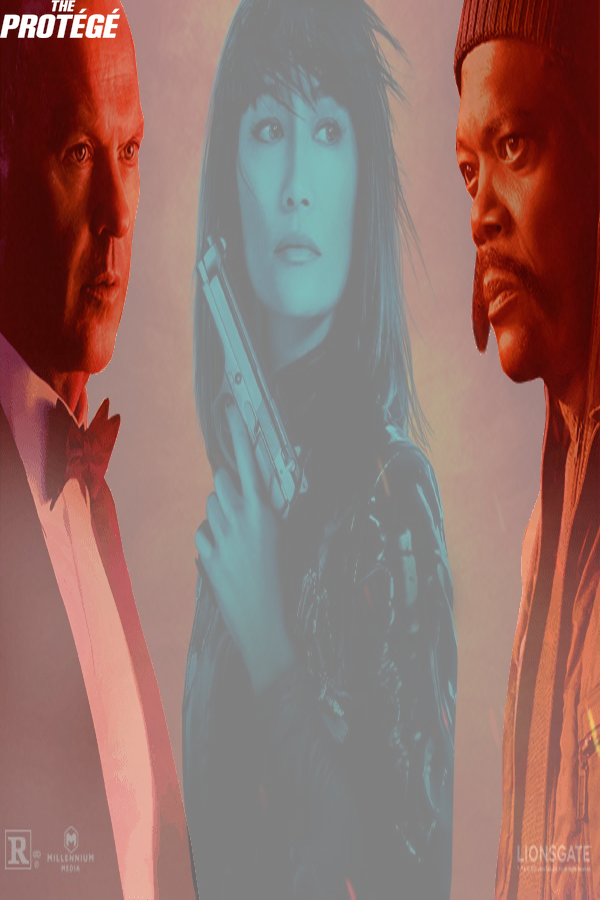

In [21]:
generated_frames[0]

In [22]:
generated_frames[0].save('../results/frames/out1.png')

In [28]:
frames=[]
frames.append([('Background','url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg-characters.png'),('Animation', 'url','../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_animation.png'), ('Animation', 'url','../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_instruction.png'),
                                   ('Background','url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg.jpg')])

In [29]:
ic = ImageComposer(600,900, frames)
generated_frames = ic.generate_frames()

Frame: [('Background', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg-characters.png'), ('Animation', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_animation.png'), ('Animation', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_instruction.png'), ('Background', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/f1-bg.jpg')]
Placement Items: [('Animation', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_animation.png'), ('Animation', 'url', '../Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/engagement_instruction.png')]
Identified Locations: [(2, 2), (2, 2)]
Adjusted Positions: [{'x_start': 120.0, 'y_start': 180.0, 'width': 360.0, 'height': 540.0}, {'x_start': 120.0, 'y_start': 180.0, 'width': 360.0, 'height': 540.0}]


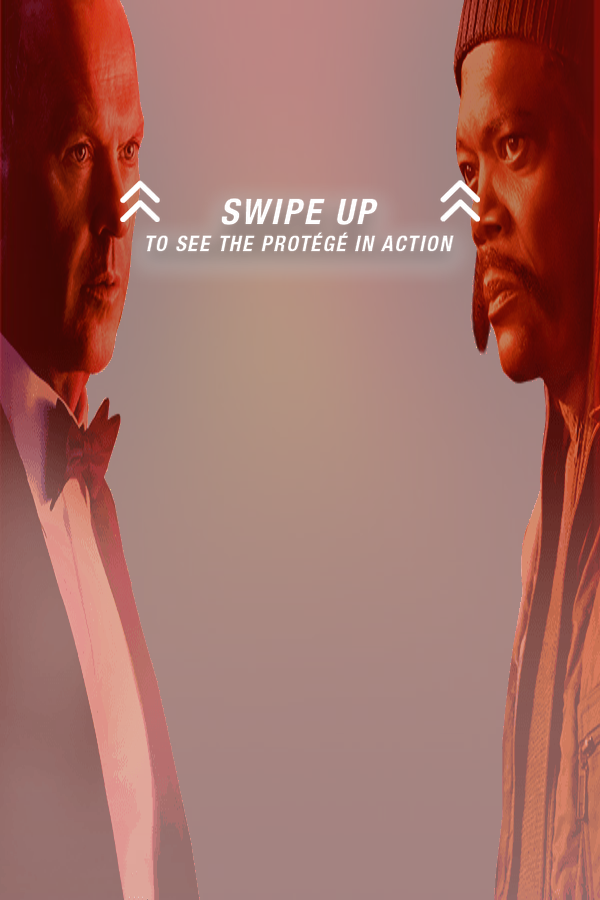

In [30]:
generated_frames[0]

In [31]:
generated_frames[0].save('../results/frames/out2.png')

In [26]:
import os

def frame(folder_path):
    # Check if the provided path is a directory
    if not os.path.isdir(folder_path):
        print(f"{folder_path} is not a valid directory.")
        return
    frames=[]
    # Loop through each file in the directory
    for filename in os.listdir(folder_path):
        # Check if the file has a JSON extension
        frames.append([filename.split('.')[0],'url', f'{folder_path}{filename}'])
    return frames

In [27]:
folder_path ='./images/composed/asset_2/'
frames = frame(folder_path)
frames.sort()
for i in range(len(frames)):
    frames[i][0] = frames[i][0][2:]
frames=[tuple(fram) for fram in frames]   
frames=[frames] 
ic = ImageComposer(600,900, frames)
background1 = ic.generate_frames()
background1[0].save('./images/composed/output_2/landing.png')

./images/composed/asset_2/ is not a valid directory.


AttributeError: 'NoneType' object has no attribute 'sort'